In [99]:
import pandas as pd
import numpy as np

In [105]:
data=pd.read_csv("C:/Users/Khyati Sharma/OneDrive/Desktop/crop_yield_train.csv")

In [103]:
print("initial data")
print(data.head())

initial data
               State District                Crop  Crop_Year       Season  \
0          Jharkhand   RAMGARH             Potato       2013  Winter        
1  Jammu and Kashmir     REASI  Moong(Green Gram)       2015  Kharif        
2            Haryana   GURGAON       Sweet potato       2009  Whole Year    
3      Uttar Pradesh    JALAUN           Sannhamp       2010  Kharif        
4         Tamil Nadu   MADURAI          Sugarcane       2006  Whole Year    

    Area   Production   Yield  
0  1361.0      7544.0    5.54  
1    13.0         9.0    0.70  
2    39.0       800.0   20.51  
3     9.0         3.0    0.33  
4  6006.0    656204.0  109.26  


In [107]:
print("checkig for missing values")
print(data.isnull().sum())

checkig for missing values
State            0
District         0
Crop             6
Crop_Year        0
Season           0
Area             0
Production    3967
Yield            0
dtype: int64


In [109]:
data= data.dropna(subset=["Production"])

In [111]:
data= data.dropna(subset=["Crop"])

In [113]:
#checking missing values again
print(data.isnull().sum())

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


In [115]:
#data summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 272298 entries, 0 to 276267
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       272298 non-null  object 
 1   District    272298 non-null  object 
 2   Crop        272298 non-null  object 
 3   Crop_Year   272298 non-null  int64  
 4   Season      272298 non-null  object 
 5   Area        272298 non-null  float64
 6   Production  272298 non-null  float64
 7   Yield       272298 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None


In [117]:
print(data.describe())

           Crop_Year         Area     Production          Yield
count  272298.000000  2.722980e+05  2.722980e+05  272298.000000
mean     2008.883411  1.183028e+04  9.689678e+05      80.665004
std         6.573817  4.635012e+04  2.178956e+07     920.852795
min      1997.000000  1.000000e-02  0.000000e+00       0.000000
25%      2003.000000  8.000000e+01  8.700000e+01       0.570000
50%      2009.000000  5.630000e+02  7.140000e+02       1.030000
75%      2015.000000  4.253750e+03  7.190000e+03       2.500000
max      2020.000000  8.580100e+06  1.597800e+09   38800.000000


In [119]:
print(data.shape)

(272298, 8)


In [121]:
print(data.columns)

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')


In [123]:
high_yield_data=data[data["Yield"]>50]
print(high_yield_data)

                 State        District        Crop  Crop_Year       Season  \
4           Tamil Nadu          MADURAI  Sugarcane       2006  Whole Year    
6              Haryana        FARIDABAD  Sugarcane       2007  Whole Year    
42           Karnataka            KOLAR   Coconut        1998  Whole Year    
61             Manipur          THOUBAL  Sugarcane       2016  Whole Year    
157            Manipur          THOUBAL  Sugarcane       2010  Whole Year    
...                ...              ...        ...        ...          ...   
276165  Andhra Pradesh        ANANTAPUR  Sugarcane       1997  Kharif        
276172       Karnataka        BAGALKOTE   Coconut        2014  Whole Year    
276184           Assam           KAMRUP   Coconut        2001  Whole Year    
276212       Rajasthan            SIKAR  Sugarcane       2011  Whole Year    
276264      Tamil Nadu  TIRUCHIRAPPALLI   Coconut        2002  Whole Year    

         Area   Production     Yield  
4       6006.0    656204

In [125]:
data[['Yield','Crop','Season']]

,Yield,Crop,Season
0,5.54,Potato,Winter
1,0.70,Moong(Green Gram),Kharif
2,20.51,Sweet potato,Whole Year
3,0.33,Sannhamp,Kharif
4,109.26,Sugarcane,Whole Year
...,...,...,...
276262,4.40,Potato,Kharif
276263,0.54,Castor seed,Kharif
276264,14054.41,Coconut,Whole Year
276265,0.22,Niger seed,Kharif


In [127]:
print(data.iloc[1])

State         Jammu and Kashmir
District                  REASI
Crop          Moong(Green Gram)
Crop_Year                  2015
Season              Kharif     
Area                       13.0
Production                  9.0
Yield                       0.7
Name: 1, dtype: object


In [141]:

# Group by Crop and count how many times each appears
crop_counts = data.groupby('Crop').size().reset_index(name='Count')

print(crop_counts)

                   Crop  Count
0                 Bajra      1
1          Cotton(lint)      1
2          Dry chillies      1
3                Ginger      1
4               Khesari      1
5     Moong(Green Gram)      1
6   Other Kharif pulses      1
7     Other Rabi pulses      1
8                Potato      1
9              Sannhamp      2
10            Sugarcane      2
11         Sweet potato      1
12             Turmeric      1
13                Wheat      1


In [129]:
data.groupby('Yield').mean(numeric_only=True)

,Crop_Year,Area,Production
Yield,,,
0.00,2003.266520,2738.443183,6.164097e+00
0.01,2007.115385,39956.528846,4.010128e+02
0.02,2007.896825,48026.750079,9.098651e+02
0.03,2007.039735,19640.854040,5.686954e+02
0.04,2006.488235,28310.737412,1.121500e+03
...,...,...,...
30093.33,2015.000000,75.000000,2.257000e+06
31578.95,2018.000000,19.000000,6.000000e+05
32957.75,2019.000000,71.000000,2.340000e+06


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

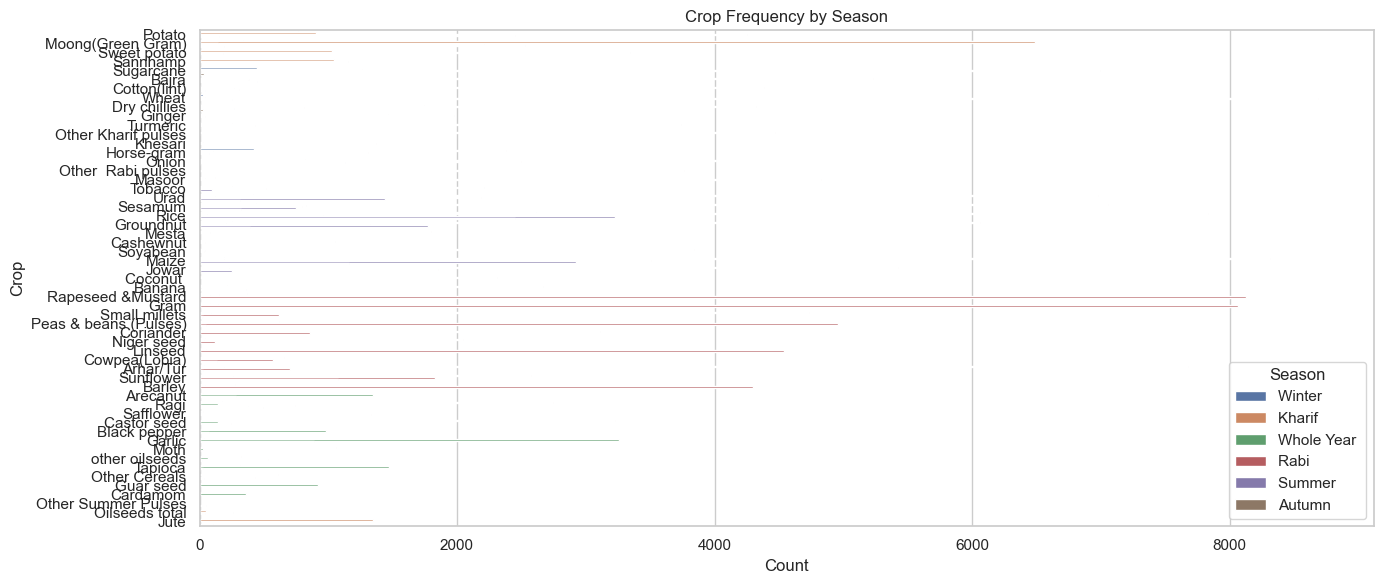

In [133]:
# Barplot for count by crop and season
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.countplot(data=data, y='Crop', hue='Season')
plt.title("Crop Frequency by Season")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.legend(title='Season')
plt.tight_layout()
plt.show()

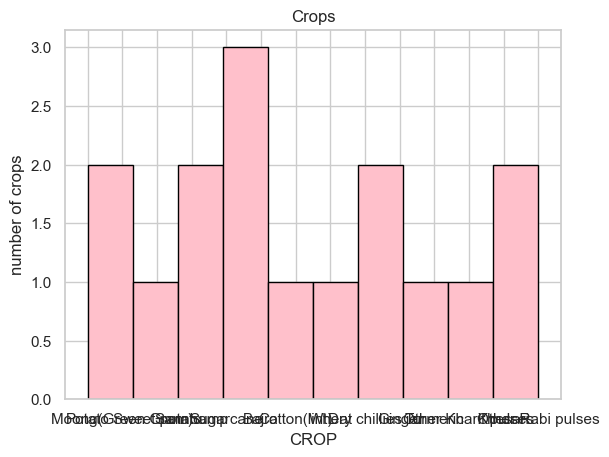

In [166]:
plt.hist(data['Crop'], bins=10, color='pink', edgecolor='black')
plt.title('Crops')
plt.xlabel('CROP')
plt.ylabel('number of crops')
plt.show()

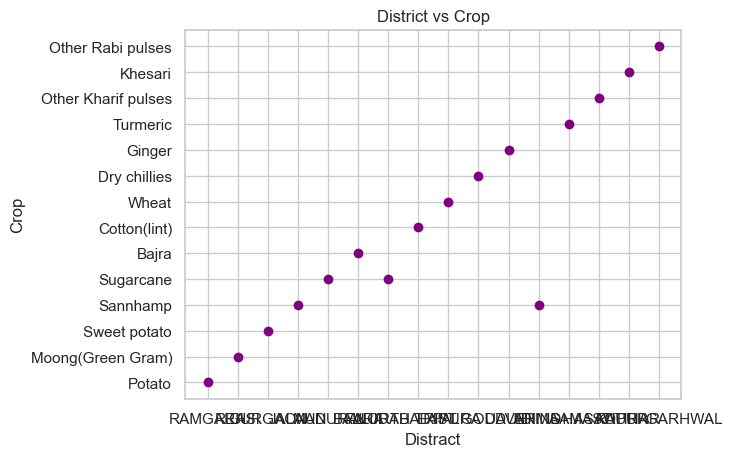

In [188]:
plt.scatter(data['District'],data['Crop'],color='purple')
plt.title('District vs Crop')
plt.xlabel('Distract')
plt.ylabel('Crop')
plt.show()

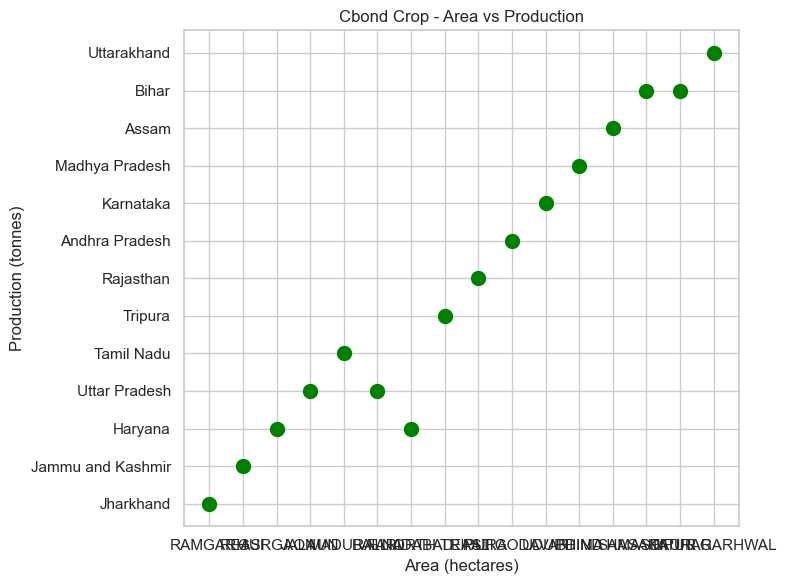

In [212]:
# Scatter plot: Area vs Production
plt.figure(figsize=(8,6))
plt.scatter(data['District'], data['State'], color='green', s=100)

plt.title('Cbond Crop - Area vs Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [271]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use only the necessary columns and drop missing values
data = data[['State', 'District', 'Crop']].dropna()

# Label encode all categorical columns
le_state = LabelEncoder()
le_district = LabelEncoder()
le_crop = LabelEncoder()

data['State_encoded'] = le_state.fit_transform(data['State'])
data['District_encoded'] = le_district.fit_transform(data['District'])
data['Crop_encoded'] = le_crop.fit_transform(data['Crop'])

# Define features and target
X = data[['State_encoded', 'District_encoded']]
y = data['Crop_encoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Handle dynamic number of labels in classification report
unique_labels = sorted(y_test.unique())

# Print classification report with correct labels
print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels,
    target_names=le_crop.inverse_transform(unique_labels)
))




                   precision    recall  f1-score   support

            Bajra       0.00      0.00      0.00       1.0
          Khesari       0.00      0.00      0.00       1.0
Moong(Green Gram)       0.00      0.00      0.00       1.0
           Potato       0.00      0.00      0.00       1.0

        micro avg       0.00      0.00      0.00       4.0
        macro avg       0.00      0.00      0.00       4.0
     weighted avg       0.00      0.00      0.00       4.0



C:\Users\Khyati Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khyati Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khyati Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khyati Sharma\a